In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings            
warnings.filterwarnings("ignore") 

# Load and Check Data <a id="-1"></a>

In [ ]:
data = pd.read_csv("worlddata.csv");
test = pd.read_csv("test.csv");

data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,312.0,78.500000,45.104737,1.000,39.75000,78.5000,117.25000,156.000
Score,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
GDP per capita,312.0,0.898298,0.394592,0.000,0.60950,0.9600,1.21950,2.096
Social support,312.0,1.211026,0.300310,0.000,1.05575,1.2655,1.45750,1.644
Healthy life expectancy,312.0,0.661295,0.252724,0.000,0.48825,0.6990,0.85800,1.141
Freedom to make life choices,312.0,0.423538,0.156024,0.000,0.32250,0.4495,0.54025,0.724
Generosity,312.0,0.182926,0.096739,0.000,0.10875,0.1755,0.24500,0.598
Perceptions of corruption,311.0,0.111299,0.095365,0.000,0.05000,0.0820,0.14050,0.457


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    312 non-null int64
Country or region               312 non-null object
Score                           312 non-null float64
GDP per capita                  312 non-null float64
Social support                  312 non-null float64
Healthy life expectancy         312 non-null float64
Freedom to make life choices    312 non-null float64
Generosity                      312 non-null float64
Perceptions of corruption       311 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 24.4+ KB


In [ ]:
df = data.copy()
df = df.select_dtypes(include=["float64","int64"])
df.head()

,score,gdp,social,healthy,freedom,generosity,corruption
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
outliers_vector = df_table[outliers_vector]
outliers_vector.index.values

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  13,  14,  16,  33,
        75,  97, 150,   0,   1,   2,   4,   5,   6,   7,   8,  10,  13,
        15,  33,  75, 151])

In [ ]:
df_table = data.copy()
df_table["score"].iloc[outliers_vector.index.values] = df_table["score"].mean()
df_table["department"].iloc[outliers_vector.index.values]

0      0.111794
1      0.111794
2      0.111794
4      0.111794
5      0.111794
6      0.111794
7      0.111794
8      0.111794
9      0.111794
13     0.111794
14     0.111794
16     0.111794
33     0.111794
75     0.111794
97     0.111794
150    0.111794
0      0.111794
1      0.111794
2      0.111794
4      0.111794
5      0.111794
6      0.111794
7      0.111794
8      0.111794
10     0.111794
13     0.111794
15     0.111794
33     0.111794
75     0.111794
151    0.111794
Name: corruption, dtype: float64

In [ ]:
data = df_table

# Simple Linear Regressions <a id="1"></a>
Simple linear regression is a statistical method has been applied on the world data set of 2019 and used to train our model using test dataset of university students.
Our model is used to predict the happiness scores of Freedom, Social and Health  parameters  of university students based on world dataset.

This allows us to summarize and analyze the relationships between continuous (quantitative) variables:



In [ ]:
y = data[["score"]]
y.head

<bound method NDFrame.head of      score
0    7.632
1    7.594
2    7.555
3    7.495
4    7.487
..     ...
151  3.334
152  3.231
153  3.203
154  3.083
155  2.853

[312 rows x 1 columns]>

In [ ]:
reg = LinearRegression()
model = reg.fit(X,y)
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("rscore. ", model.score(X,y))

intercept:  [3.36665334]
coef:  [[2.25409931]]
rscore.  0.6367680251195655


In [ ]:
# model.intercept + model.coef_ * 1
model.predict([[1]])

array([[5.62075264]])

In [ ]:
def linear_reg(col,text,prdctn):
    
    sns.jointplot(x=col,y="score",data=df_table,kind="reg")
    plt.show()
    
    X = data[[col]]
    y = data[["score"]]
    reg = LinearRegression()
    model = reg.fit(X,y)
    
    # prediction
    plt.figure(figsize=(12,6))
    g = sns.regplot(x=data[col],y=data["score"],ci=None,scatter_kws = {'color':'r','s':9})
    g.set_title("Model Equation")
    g.set_ylabel("score")
    g.set_xlabel(col)
    plt.show()
    
    print(text,": ", model.predict([[prdctn]]))

## happiness score - social

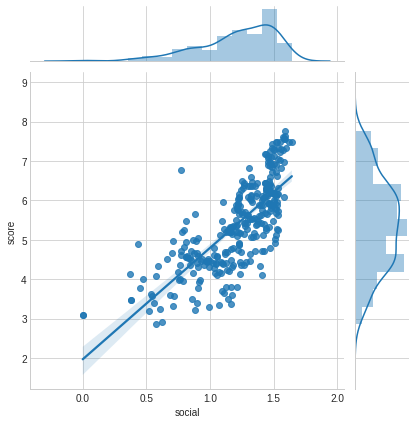

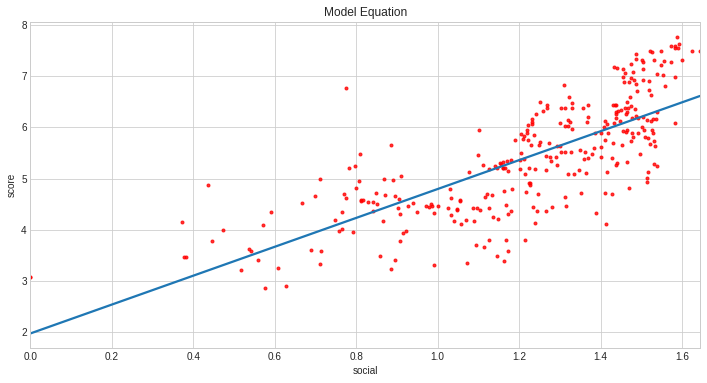

The happiness value of the country whose sociability value is 2: :  [[7.62022176]]


In [ ]:
linear_reg("social","The happiness value of the country whose sociability value is 2:",2)

In [ ]:
column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]

## happiness score - healthy

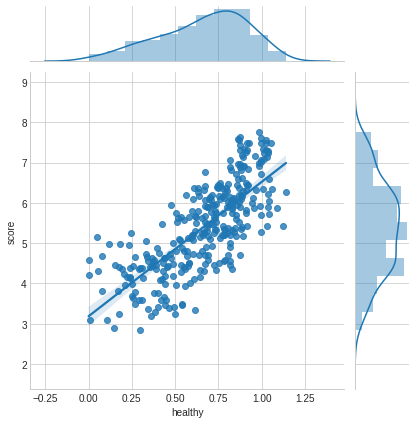

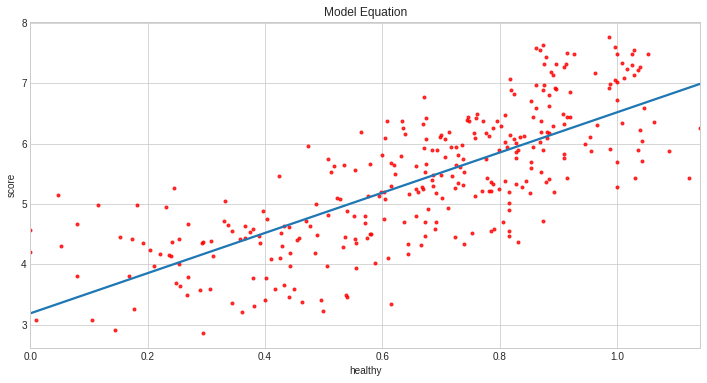

The happiness value of the country whose healthiest value is 1.20: :  [[7.18742031]]


In [ ]:
linear_reg("healthy","The happiness value of the country whose healthiest value is 1.20:",1.20)

## happiness score - freedom

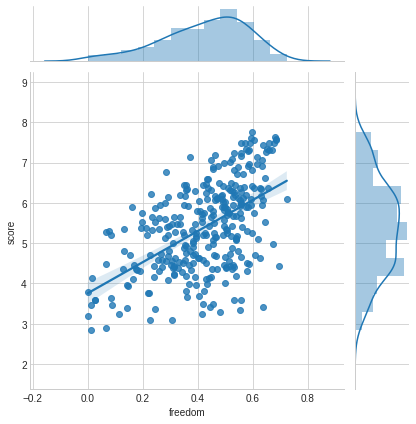

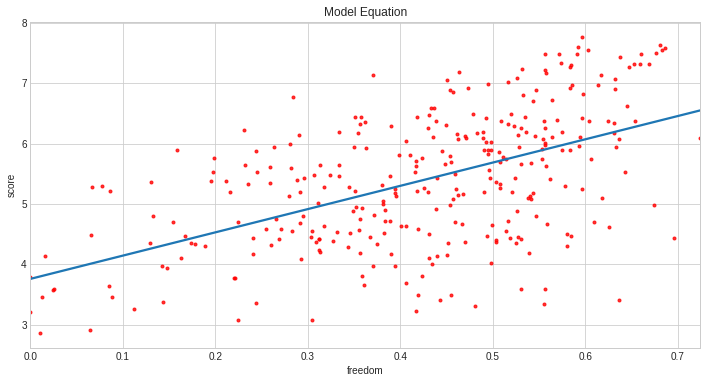

The happiness value of the country whose freedom value is 0.89: :  [[7.190655]]


In [ ]:
linear_reg("freedom","The happiness value of the country whose freedom value is 0.89:",0.89)

# Multiple Linear Regression <a id="2"></a>
The main purpose is to find the linear function that expresses the relationship between dependent and independent variables of training and test dataset respectively. And also computing the regression parameters.

In [ ]:
import statsmodels.api as sms

X = df.drop("score",axis=1)
y = df["score"]


lm = sms.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3622.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                   7.57e-281
Time:                        20:03:40   Log-Likelihood:                         -307.69
No. Observations:                 312   AIC:                                      627.4
Df Residuals:                     306   BIC:                                      649.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdp            0.5774      0.178      3.238      0.001       0.226       0.928
social         2.2624      0.153     14.780      0.000       1.961       2.564
healthy        1.2506      0.260      4.805      0.000       0.738       1.763
freedom        1.8640      0.289      6.447      0.000       1.295       2.433
generosity     2.0380      0.399      5.109      0.000       1.253       2.823
corruption     0.5464      0.468      1.169      0.243      -0.374       1.466
==============================================================================
Omnibus:                        6.324   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                7.204
Skew:                           0.212   Prob(JB):                       0.0273
Kurtosis:                       3.612   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create model with sckit learn

lm = LinearRegression()
model = lm.fit(X,y)
print("constant: ",model.intercept_)
print("coefficient: ",model.coef_)

constant:  1.8541077926951237
coefficient:  [0.929921   1.06504217 0.94321492 1.40426054 0.52070628 0.88114008]


In [ ]:
# PREDICTION
# Score = 1.06504217*social + 0.94321492*healthy + 1.40426054*freedom 

new_data = [[1.25],[1.75],[0.75]]
new_data = pd.DataFrame(new_data).T
new_data

,0,1,2,3,4,5
0,1.0,2.0,1.25,1.75,1.5,0.75


In [ ]:
model.predict(new_data)

array([9.99250222])

In [ ]:
# calculating the amount of error

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y,model.predict(X))
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  0.267683073163503
RMSE:  0.5173809748758674


# Simple Linear & Multiple Linear Regression - Model Creaton using World dataset as training data and test data as utkal university students dataset. <a id="3"></a>

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("score",axis=1)
y = df["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,gdp,social,healthy,freedom,generosity,corruption
111,0.916,0.817,0.790,0.419,0.149,0.032
52,1.187,1.465,0.812,0.264,0.075,0.064
145,1.017,1.174,0.417,0.557,0.042,0.092
47,1.162,1.232,0.825,0.462,0.083,0.005
78,1.154,1.202,0.879,0.131,0.000,0.044


In [ ]:
X_test.head()

,gdp,social,healthy,freedom,generosity,corruption
72,1.051,1.361,0.871,0.197,0.142,0.080
9,1.340,1.573,0.910,0.647,0.361,0.302
57,1.229,1.211,0.909,0.495,0.179,0.154
60,1.229,1.191,0.909,0.423,0.202,0.035
25,1.365,1.436,0.857,0.418,0.151,0.078


In [ ]:
y_train.head()

111    4.586
52     5.940
145    3.590
47     6.070
78     5.358
Name: score, dtype: float64

In [ ]:
y_test.head()

72    5.523
9     7.272
57    5.835
60    5.762
25    6.441
Name: score, dtype: float64

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Training error",np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print("Test error",np.sqrt(mean_squared_error(y_test,model.predict(X_test))))

Training error 0.5286863282545513
Test error 0.47004423364757836


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

array([-0.38049606, -0.23987782, -0.24029   , -0.41370114, -0.16258143,
       -0.37149593, -0.25642041, -0.39761278, -0.21403289, -0.29719585])

In [ ]:
cvs_avg_mse = np.mean(-cross_val_score(model, X_train, y_train, cv=20, scoring="neg_mean_squared_error"))
cvs_avg_rmse = np.sqrt(cvs_avg_mse)

print("Cross Val Score MSE = ",cvs_avg_mse)
print("Cross Val Score RMSE = ",cvs_avg_rmse)

Cross Val Score MSE =  0.29454868947078483
Cross Val Score RMSE =  0.5427234005188876


In [ ]:
#Ridge Model

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_model.coef_

array([0.94225637, 1.02043421, 0.93689001, 1.44712035, 0.35979844,
       0.97107389])

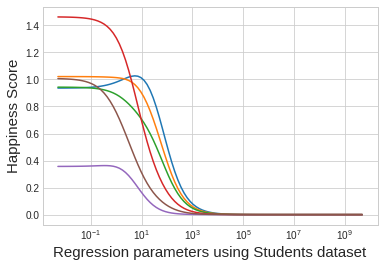

In [ ]:

for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    coefs.append(ridge_model.coef_)
plt.xlabel('Regression parameters using University Students dataset', fontsize = 15)
plt.ylabel('Happiness Score', fontsize = 15)
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale("log")

In [ ]:
ridge_model = Ridge().fit(X_train,y_train)

y_pred = ridge_model.predict(X_train)

print("predict: ", y_pred[0:10])
print("real: ", y_train[0:10].values)

predict:  [5.05318836 5.79071673 5.37059901 5.75868845 5.33588452 5.47787414
 5.95562654 5.72047349 6.84044342 6.15987674]
real:  [4.586 5.94  3.59  6.07  5.358 5.208 5.79  5.191 7.328 6.375]


In [ ]:
RMSE = np.mean(mean_squared_error(y_train,y_pred)) # rmse = square root of the mean of error squares
print("train error: ", RMSE)

train error:  0.28067189344529464


In [ ]:
Verified_RMSE = np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=20, scoring="neg_mean_squared_error")))
print("Verified_RMSE: ", Verified_RMSE)

Verified_RMSE:  0.5410728899647692


In [ ]:
# test error using University Students dataset as testdata


y_pred = ridge_model.predict(X_test)
RMSE = np.mean(mean_squared_error(y_test,y_pred))
print("test error: ", RMSE)

test error:  0.22371217702527896


In [ ]:
ridge_model = Ridge(10).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5102254754869215

In [ ]:
ridge_model = Ridge(30).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5983602488673111

In [ ]:
ridge_model = Ridge(80).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.7710248515673939

In [ ]:
ridgeCV.alpha_

0.0932603346883218

In [ ]:
# final model
ridge_tuned = Ridge(alpha = ridgeCV.alpha_).fit(X_train,y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.4739437357393685

In [ ]:
# for lambdas2
ridgeCV = RidgeCV(alphas = lambdas2,scoring = "neg_mean_squared_error", cv=10, normalize=True)
ridgeCV.fit(X_train,y_train)
ridge_tuned = Ridge(alpha = ridgeCV.alpha_).fit(X_train,y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5733853710822102

In [ ]:
# Required Libraries

# Lasso Regression

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:
X = df.drop("score",axis=1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lasso_model = Lasso().fit(X_train,y_train)

In [ ]:
print("intercept: ", lasso_model.intercept_)
print("coef: ", lasso_model.coef_)

intercept:  5.346196172248804
coef:  [0. 0. 0. 0. 0. 0.]


##  Predictions

In [ ]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_model.predict(X_train)[0:5]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
lasso_model.predict(X_test)[0:5]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.108776315534746

In [ ]:
r2_score(y_test,y_pred)

-0.015561293164185752

## Regression - Model Computations using testdata of University Students

In [ ]:
lasso_cv_model = LassoCV(cv=10,max_iter=1000).fit(X_train,y_train)
lasso_cv_model

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
lasso_cv_model.alpha_

0.0026847466799991312

In [ ]:
lasso_tuned = Lasso().set_params(alpha= lasso_cv_model.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5394427335399019

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [ ]:
X = df.drop("score",axis=1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = data.fit(X_train,y_train)

In [ ]:
model.coef_

array([0., 0., 0., 0., 0., 0.])

In [ ]:
model.intercept_

5.346196172248804

In [ ]:
# prediction
model.predict(X_train)[0:10]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617,
       5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
model.predict(X_test)[0:10]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617,
       5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.108776315534746